In [229]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [230]:
dataframe = pd.read_csv("csv/82000278_Toamnei_CO2_2021_7_SHORT.csv")
dataframe.head()

,time,latitude,longitude,altitude,co2
0,1625086823,45.651464,25.615426,100,553
1,1625086883,45.651464,25.615426,100,551
2,1625086943,45.651464,25.615426,100,551
3,1625087003,45.651464,25.615426,100,558
4,1625087063,45.651464,25.615426,100,559


In [231]:
dataframe_size = len(dataframe.index)
dataframe_size

10499

In [232]:
train = dataframe[dataframe.index < dataframe_size*(3/4)]
test = dataframe[dataframe.index >= dataframe_size*(3/4)]

In [233]:
y_train = train['co2']
y_train

0       553
1       551
2       551
3       558
4       559
       ... 
7870    458
7871    453
7872    447
7873    443
7874    444
Name: co2, Length: 7875, dtype: int64

In [234]:
y_test = test['co2']
y_test

7875     445
7876     453
7877     452
7878     452
7879     448
        ... 
10494    671
10495    671
10496    671
10497    670
10498    674
Name: co2, Length: 2624, dtype: int64

In [235]:
x_train = train['time']
x_train

0       1625086823
1       1625086883
2       1625086943
3       1625087003
4       1625087063
           ...    
7870    1625558999
7871    1625559059
7872    1625559119
7873    1625559179
7874    1625559239
Name: time, Length: 7875, dtype: int64

In [236]:
x_test = test['time']
x_test

7875     1625559300
7876     1625559360
7877     1625559420
7878     1625559479
7879     1625559540
            ...    
10494    1625716432
10495    1625716492
10496    1625716553
10497    1625716613
10498    1625716673
Name: time, Length: 2624, dtype: int64

In [237]:
# Convert to numpy array
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

y=[]
i=0
for el in y_train:
    y.append(el[0])
y

[553,
 551,
 551,
 558,
 559,
 559,
 559,
 558,
 556,
 554,
 558,
 560,
 562,
 560,
 560,
 562,
 560,
 560,
 559,
 560,
 561,
 565,
 559,
 558,
 559,
 559,
 557,
 556,
 559,
 562,
 561,
 558,
 558,
 561,
 563,
 562,
 563,
 560,
 560,
 563,
 563,
 565,
 565,
 564,
 565,
 562,
 562,
 563,
 562,
 560,
 564,
 562,
 566,
 567,
 568,
 566,
 568,
 568,
 570,
 570,
 569,
 571,
 576,
 577,
 576,
 575,
 576,
 575,
 573,
 574,
 576,
 572,
 573,
 574,
 578,
 577,
 576,
 568,
 567,
 571,
 574,
 574,
 573,
 574,
 572,
 571,
 571,
 570,
 571,
 575,
 575,
 576,
 575,
 576,
 575,
 575,
 572,
 573,
 574,
 578,
 577,
 578,
 573,
 570,
 570,
 570,
 570,
 570,
 569,
 570,
 568,
 570,
 568,
 567,
 568,
 576,
 574,
 572,
 574,
 575,
 576,
 572,
 571,
 574,
 574,
 577,
 572,
 570,
 569,
 572,
 576,
 578,
 581,
 579,
 577,
 580,
 578,
 574,
 574,
 571,
 570,
 571,
 573,
 575,
 576,
 574,
 573,
 573,
 576,
 577,
 578,
 578,
 573,
 574,
 575,
 569,
 562,
 567,
 567,
 570,
 568,
 569,
 569,
 570,
 571,
 574,
 575

In [243]:
import sklearn
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

rng = np.random.RandomState(1)
clf = AdaBoostRegressor( DecisionTreeRegressor(max_depth=20), n_estimators=100, random_state=rng)
# from sklearn.ensemble import GradientBoostingRegressor
# all_models = {}
# common_params = dict(
#     learning_rate=0.05,
#     n_estimators=200,
#     max_depth=2,
#     min_samples_leaf=9,
#     min_samples_split=9,
# )
# for alpha in [0.05, 0.5, 0.95]:
#     gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, **common_params)
#     all_models["q %1.2f" % alpha] = gbr.fit(x_train, y_train)
# clf = GradientBoostingRegressor(loss="quantile", **common_params)


# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import AdaBoostRegressor
# rng = np.random.RandomState(1)
# clf = AdaBoostRegressor( DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng)

In [244]:
#x_train = sklearn.utils.validation.column_or_1d(x_train, warn=True)

#y_train = sklearn.utils.validation.column_or_1d(y_train, warn=True)

clf.fit(x_train, y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100,
                  random_state=RandomState(MT19937) at 0x2308C69AB40)

In [245]:
x_test = x_test.reshape(-1,1)
x_test

array([[1625559300],
       [1625559360],
       [1625559420],
       ...,
       [1625716553],
       [1625716613],
       [1625716673]], dtype=int64)

In [247]:
# clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)

y_pred

array([552.33333333, 552.33333333, 558.        , ..., 445.        ,
       445.        , 444.        ])

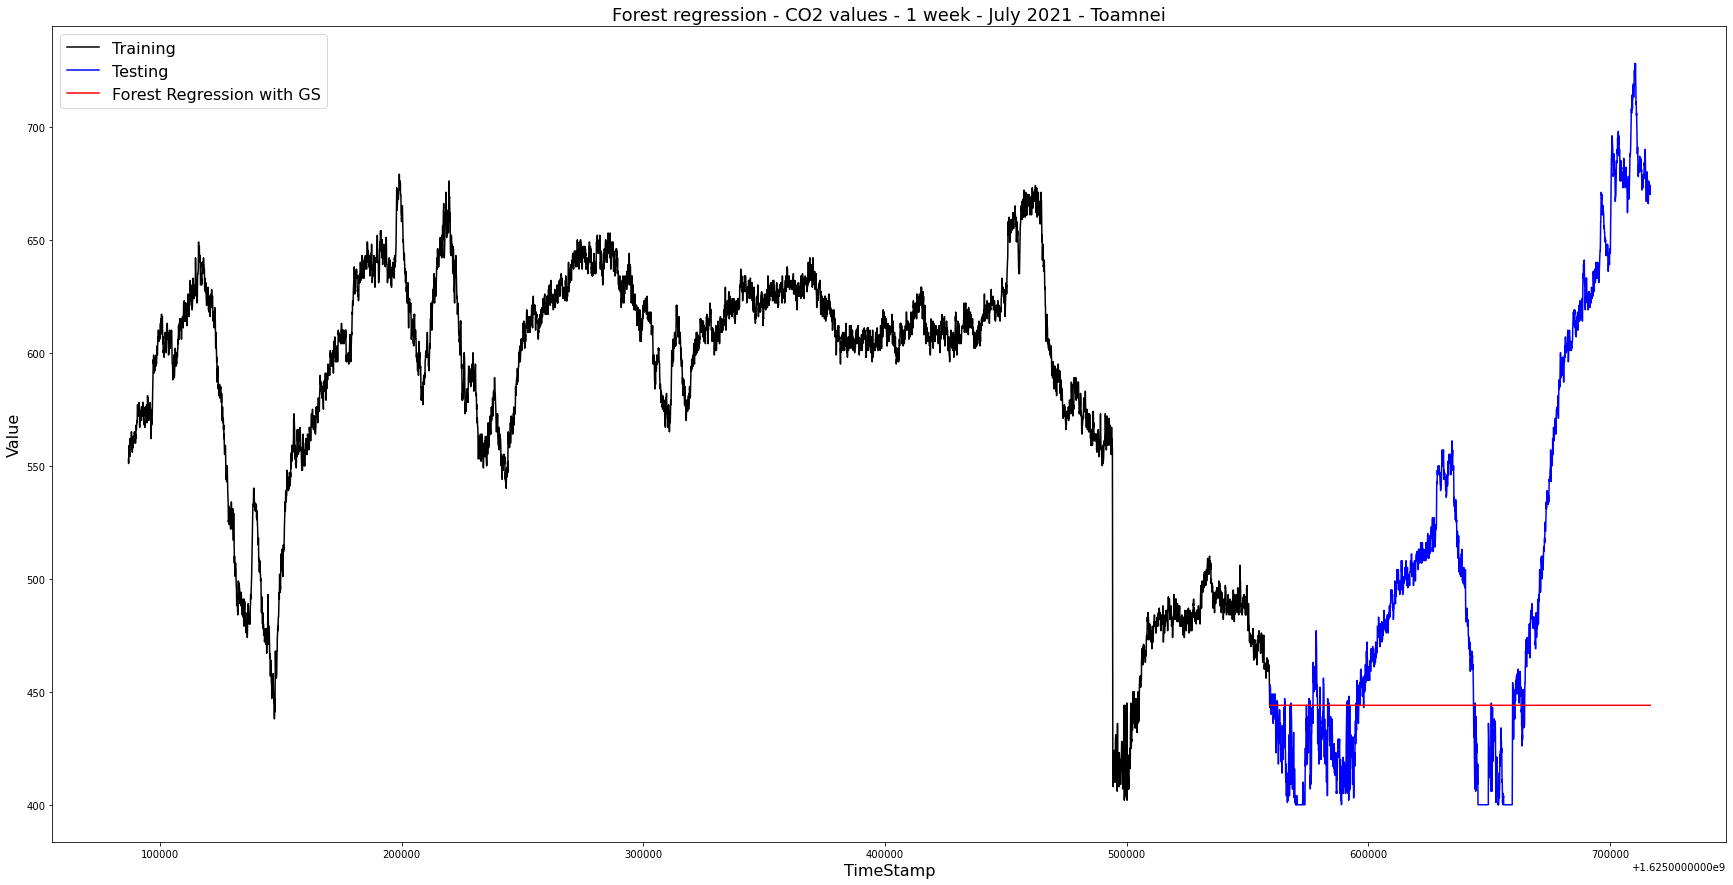

In [242]:
plt.figure(figsize=(30,15))
plt.plot(x_train, y_train, color = 'black', label= 'Training')
plt.plot(x_test, y_test, color = 'blue', label = 'Testing')
plt.plot(x_test, y_pred, color = 'red', label = 'Forest Regression with GS')
# plt.scatter(X, y, color = "green")
# plt.scatter(X, y_pred, color = "black")
plt.title('Forest regression - CO2 values - 1 week - July 2021 - Toamnei', fontsize=18)
plt.xlabel('TimeStamp', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize=16)
# plt.savefig('plots_from_csv/PM10_Toamnei_2021-12_ARD.jpg', bbox_inches = 'tight')
plt.show()